In [1]:
#импортирование пакетов
import pandas as pd
import numpy as np

### Описание данных

**trustLevel** - Индивидуальный уровень доверия клиента. 6: Высочайшая надежность<br>

**totalScanTimeInSeconds** - Общее время в секундах между первым и последним отсканированным продуктом<br>

**grandTotal** - Общая стоимость отсканированных продуктов <br>

**lineItemVoids** - Количество аннулированных сканирований	<br>

**scansWithoutRegistration** - Количество попыток сканирования без какого-либо сканирования (неудачное сканирование)<br>

**quantityModification** - Число изменений количества товаров для одного из сканируемых продуктов	<br>

**scannedLineItemsPerSecond** - Среднее количество отсканированных продуктов в секунду	<br>

**valuePerSecond** - Средняя общая стоимость отсканированных продуктов в секунду	<br>

**lineItemVoidsPerPosition** - Отношение числа аннулированных сканирований к общему числу аннулированных и не аннулированных сканирований	<br>

**fraud** - Классификатор как мошенничество (1) или не мошенничество (0)<br>

In [2]:
#Читаем файл данных 
data = pd.read_csv('DataSet2_1.csv', sep='|')
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [3]:
data_mod = data.copy(deep = True)

### Введенные вычислимые показатели

ne_otm	Количество неотменённых заказов	= totalScanTimeInSeconds * scannedLineItemsPerSecond <br>

otm_i_ne_otm	Отношение количества аннулированных сканирований к не аннулированным	= lineItemVoids + ne_otm <br>

sec_na_1_udach_scan	Отношение общего времени к количеству удачных сканирований	= totalScanTimeInSeconds / otm_i_ne_otm <br>

udach_i_neudach_scan	Количество удачных и неудачных сканирований	= otm_i_ne_otm + scansWithoutRegistration<br>

dolya_neudach_scan	Отношение количества удачных сканирований к неудачным	= scansWithoutRegistration / udach_i_neudach_scan<br>

sec_na_1_scan	Отношение общего времени в магазине к общему количеству сканирований	= totalScanTimeInSeconds / udach_i_neudach_scan<br>


In [4]:
data_mod["ne_otm"] = data_mod.totalScanTimeInSeconds * data_mod.scannedLineItemsPerSecond
data_mod["otm_i_ne_otm"] = data_mod.lineItemVoids + data_mod.ne_otm
data_mod["sec_na_1_udach_scan"] = data_mod.totalScanTimeInSeconds / data_mod.otm_i_ne_otm
data_mod["udach_i_neudach_scan"] = data_mod.otm_i_ne_otm + data_mod.scansWithoutRegistration
data_mod["dolya_neudach_scan"] = data_mod.scansWithoutRegistration / data_mod.udach_i_neudach_scan
data_mod["sec_na_1_scan"] = data_mod.totalScanTimeInSeconds / data_mod.udach_i_neudach_scan
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


### Проверяем данные на излишние показатели

In [5]:
#импортирование пакетов
from sklearn.feature_selection import VarianceThreshold

In [6]:
# убираем колонки, у которых дисперсия около нуля
data_mod1 = data_mod.copy(deep = True)
selector = VarianceThreshold(threshold=0.1)
new_data = selector.fit_transform(data_mod1)
idxs = selector.get_support(indices=True)
print(idxs)
new_data = pd.DataFrame(new_data, columns=[data_mod1.columns.tolist()[i] for i in idxs])
new_data['fraud'] = data_mod['fraud']
new_data.head()

[ 0  1  2  3  4  5  7  8 10 11 12 13 15]


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,valuePerSecond,lineItemVoidsPerPosition,ne_otm,otm_i_ne_otm,sec_na_1_udach_scan,udach_i_neudach_scan,sec_na_1_scan,fraud
0,5.0,1054.0,54.70,7.0,0.0,3.0,0.051898,0.241379,29.0,36.0,29.277778,36.0,29.277778,0
1,3.0,108.0,27.36,5.0,2.0,4.0,0.253333,0.357143,14.0,19.0,5.684211,21.0,5.142857,0
2,3.0,1516.0,62.16,3.0,10.0,5.0,0.041003,0.230769,13.0,16.0,94.750000,26.0,58.307692,0
3,6.0,1791.0,92.31,8.0,4.0,4.0,0.051541,0.275862,29.0,37.0,48.405405,41.0,43.682927,0
4,5.0,430.0,81.53,3.0,7.0,2.0,0.189605,0.111111,27.0,30.0,14.333333,37.0,11.621622,0


In [7]:
import seaborn as sb
import matplotlib.pyplot as plt


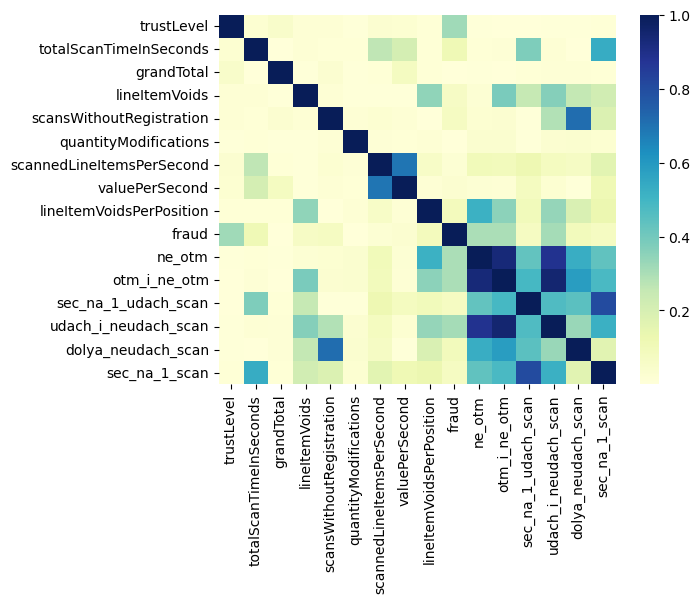

In [8]:
# убираем колонки, с корреляцией больше 0.75
data_mod2 = data_mod.copy(deep = True)
# создаем матрицу корреляции
corr_matrix = data_mod2.corr().abs()
dataplot = sb.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

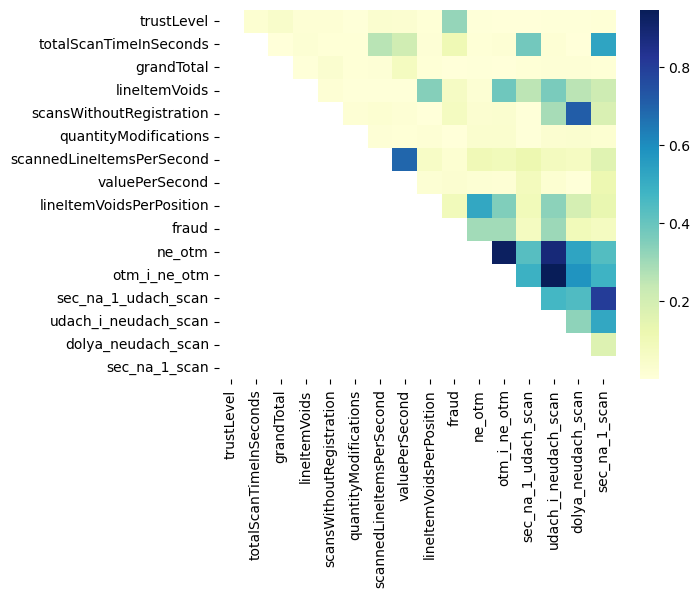

['otm_i_ne_otm', 'udach_i_neudach_scan', 'sec_na_1_scan']


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,ne_otm,sec_na_1_udach_scan,dolya_neudach_scan
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0,29.277778,0.000000
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0,5.684211,0.095238
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0,94.750000,0.384615
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0,48.405405,0.097561
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0,14.333333,0.189189


In [9]:
# заполняем вернхний треугольник матрицы корреляции
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
# выбираем колонки, с кореляцией больше 0.75
dataplot = sb.heatmap(upper, cmap="YlGnBu")
plt.show()
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)
# убираем колонки, с кореляцией больше 0.75
data_mod2.drop(to_drop, axis = 1, inplace = True)
data_mod2.head()

### Разбиваем данные на обучающую и тестовую выборки <br> в отношении 80/20

In [10]:
n = len(data['trustLevel'])
t = round(n*0.8)

In [11]:
data_train = data[0:t]
data_test = data[t:n]

data_train_mod = data_mod[0:t]
data_test_mod = data_mod[t:n]

In [12]:
X_train = data_train.drop(data_train.columns[9], axis = 1)
y_train = data_train.fraud.values

X_test = data_test.drop(data_test.columns[9], axis = 1)
y_test = data_test.fraud.values

In [13]:
X_train_mod = data_train_mod.drop(data_train_mod.columns[9], axis = 1)
y_train_mod = data_train_mod.fraud.values

X_test_mod = data_test_mod.drop(data_test_mod.columns[9], axis = 1)
y_test_mod = data_test_mod.fraud.values

In [14]:
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [15]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res_df = pd.DataFrame({"correct":y_test, "predict":y_pred})
res = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Верно идентифицировано (%):", res)

Верно идентифицировано (%): 96.81


In [16]:
model = SVC(kernel = 'linear')
model.fit(X_train_mod, y_train_mod)
y_pred_mod = model.predict(X_test_mod)
res_df_mod = pd.DataFrame({"correct":y_test_mod, "predict":y_pred_mod})
res_mod = round(accuracy_score(y_test_mod, y_pred_mod) * 100, 2)
print("Верно идентифицировано (%):", res_mod)

Верно идентифицировано (%): 98.94


In [17]:
#без колонок с дисперсией около нуля
data_train_nd = new_data[0:t]
data_test_nd = new_data[t:n]

X_train_nd = data_train_nd.iloc[:, : 13]
y_train_nd = data_train_nd.fraud.values

X_test_nd = data_test_nd.iloc[:, : 13]
y_test_nd = data_test_nd.fraud.values

model = SVC(kernel = 'linear')
model.fit(X_train_nd, y_train_nd)
y_pred_nd = model.predict(X_test_nd)
res_df_nd = pd.DataFrame({"correct":y_test_nd, "predict":y_pred_nd})
res_nd = round(accuracy_score(y_test_nd, y_pred_nd) * 100, 2)
print("Верно идентифицировано (%):", res_nd)

Верно идентифицировано (%): 99.2


In [18]:
#без колонок с корреляцией больше 0.75
data_train_dm2 = data_mod2[0:t]
data_test_dm2 = data_mod2[t:n]

X_train_dm2 = data_train_dm2.drop(data_train_dm2.columns[9], axis = 1)
y_train_dm2 = data_train_dm2.fraud.values

X_test_dm2 = data_test_dm2.drop(data_test_dm2.columns[9], axis = 1)
y_test_dm2 = data_test_dm2.fraud.values

model = SVC(kernel = 'linear')
model.fit(X_train_dm2, y_train_dm2)
y_pred_dm2 = model.predict(X_test_dm2)
res_df_dm2 = pd.DataFrame({"correct":y_test_dm2, "predict":y_pred_dm2})
res_dm2 = round(accuracy_score(y_test_dm2, y_pred_dm2) * 100, 2)
print("Верно идентифицировано (%):", res_dm2)

Верно идентифицировано (%): 99.2


### Задание - Предварительная очистка и подготовка данных
1. Добавить дополнительно 3-4 колонки с вычисленными дополнительными метриками
2. Убрать колонки с околонулевой дисперсией
3. Убрать колонки с высокой кор-ей
4. Проверить качество классификации с помощью модели (например SVC).